In [5]:
import tensorflow.keras

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')


In [8]:
car_df.shape

(500, 9)

In [9]:
car_df.head(2)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566


In [10]:
X = car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)

In [11]:
y = car_df['Car Purchase Amount'] 
y.shape

(500,)

In [12]:
from sklearn.preprocessing import MinMaxScaler 

scaler_x = MinMaxScaler() 
X_scaled = scaler_x.fit_transform(X)

In [13]:
y = y.values.reshape(-1,1)

In [14]:
scaler_y = MinMaxScaler()

y_scaled = scaler_y.fit_transform(y)



In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [16]:
# Import Tensorflow.keras to maker our models run faster

import tensorflow.keras

# We import Sequential the steps go from left to right

from keras.models import Sequential

# Fully Connected to next layer
from keras.layers import Dense

from sklearn.preprocessing import MinMaxScaler

# Building Model
 
model = Sequential()

# 25 Neuoron , 5 - Features - Activation relu

# In a neural network, the activation function is responsible for transforming the summed
#weighted input from the node into the activation of the node or output for that input

# plus adding first input layer

# Four types of activation in neural network 

# Relu , Tanah ,Sigmoid . Linear




model.add(Dense(40, input_dim=5, activation='relu'))



# Adding second Hidden Layer

model.add(Dense(40, activation='relu'))


# We need the get single output / Out put activation function 

model.add(Dense(1, activation='linear'))

# threshold: A float giving the threshold value of the activation function below which values will be damped or set to zero.

model.summary()

# 25 neurons in hidden layer   (None, 25)   +             150 params =     25 newuron * 5 inputs       +      25 biases 

# dense_5 (Dense)              (None, 25)                650 

# 25 neuron(Input layer) * 25 neuron ( Output Layer) + 25 baises


#Bias is like the intercept added in a linear equation. 
#It is an additional parameter in the Neural Network which is
#used to adjust the output along with the weighted sum of the inputs to the neuron. 
#Thus, Bias is a constant which helps the model in a way that it can fit best for the given data


# 25 Neurons and One bais



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile('adam',loss='mean_squared_error')



In [18]:
epochs_hist = model.fit(X_train,y_train,epochs=80,batch_size=25,verbose=1,validation_split=0.3)

Epoch 1/80
11/11 [==============================] - 0s 16ms/step - loss: 0.1122 - val_loss: 0.0386
Epoch 2/80
11/11 [==============================] - 0s 5ms/step - loss: 0.0339 - val_loss: 0.0295
Epoch 3/80
11/11 [==============================] - 0s 4ms/step - loss: 0.0225 - val_loss: 0.0122
Epoch 4/80
11/11 [==============================] - 0s 4ms/step - loss: 0.0105 - val_loss: 0.0069
Epoch 5/80
11/11 [==============================] - 0s 4ms/step - loss: 0.0065 - val_loss: 0.0039
Epoch 6/80
11/11 [==============================] - 0s 4ms/step - loss: 0.0049 - val_loss: 0.0032
Epoch 7/80
11/11 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.0027
Epoch 8/80
11/11 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.0023
Epoch 9/80
11/11 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 10/80
11/11 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 11/80
11/11 

In [19]:
import matplotlib.pyplot as plt

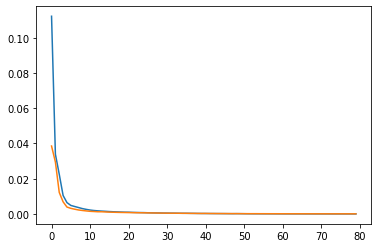

In [20]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

In [21]:
y_predicted =  model.predict(X_test)

In [22]:
y_predicted

array([[0.6572528 ],
       [0.4679026 ],
       [0.36512458],
       [0.54771906],
       [0.8197306 ],
       [0.75869095],
       [0.14658329],
       [0.75990665],
       [0.33940208],
       [0.5244292 ],
       [0.43465424],
       [0.2696365 ],
       [0.58861494],
       [0.66079223],
       [0.48825347],
       [0.2637647 ],
       [0.42429808],
       [0.2720946 ],
       [0.39110056],
       [0.60054857],
       [0.4992526 ],
       [0.32585087],
       [0.7607685 ],
       [0.7143855 ],
       [0.38476336],
       [0.560046  ],
       [0.54346395],
       [0.60972106],
       [0.4216321 ],
       [0.77064544],
       [0.50324404],
       [0.5511471 ],
       [0.6235306 ],
       [0.50013065],
       [0.331833  ],
       [0.4279713 ],
       [0.27529585],
       [0.2856846 ],
       [0.26844877],
       [0.52895796],
       [0.5123659 ],
       [0.45553273],
       [0.2757388 ],
       [0.725625  ],
       [0.41403088],
       [0.45804396],
       [0.39281762],
       [0.398

In [23]:
correctoutput = scaler_y.inverse_transform(y_predicted)

In [24]:
correctoutput

array([[55664.945],
       [42221.082],
       [34923.848],
       [47888.05 ],
       [67200.87 ],
       [62867.055],
       [19407.414],
       [62953.37 ],
       [33097.547],
       [46234.473],
       [39860.45 ],
       [28144.193],
       [50791.66 ],
       [55916.246],
       [43665.996],
       [27727.295],
       [39125.164],
       [28318.717],
       [36768.14 ],
       [51638.945],
       [44446.934],
       [32135.412],
       [63014.56 ],
       [59721.37 ],
       [36318.195],
       [48763.266],
       [47585.938],
       [52290.195],
       [38935.88 ],
       [63715.824],
       [44730.324],
       [48131.44 ],
       [53270.67 ],
       [44509.273],
       [32560.145],
       [39385.96 ],
       [28546.006],
       [29283.605],
       [28059.863],
       [46556.016],
       [45377.977],
       [41342.824],
       [28577.455],
       [60519.37 ],
       [38396.19 ],
       [41521.12 ],
       [36890.05 ],
       [37259.73 ],
       [54612.562],
       [30302.844],


In [25]:
y_test

array([[0.6691568 ],
       [0.45573492],
       [0.37628608],
       [0.54907212],
       [0.81860421],
       [0.79707352],
       [0.14863766],
       [0.76110147],
       [0.34170423],
       [0.52661271],
       [0.43668833],
       [0.27413582],
       [0.58735466],
       [0.66298048],
       [0.49805458],
       [0.25779114],
       [0.42831636],
       [0.26804521],
       [0.39926954],
       [0.60775236],
       [0.50188722],
       [0.32481193],
       [0.77280198],
       [0.71491172],
       [0.38757338],
       [0.571387  ],
       [0.54380447],
       [0.61231998],
       [0.41838955],
       [0.76168793],
       [0.5048829 ],
       [0.58506904],
       [0.62041473],
       [0.50109082],
       [0.33433524],
       [0.42962519],
       [0.2911385 ],
       [0.28171911],
       [0.27746526],
       [0.53113416],
       [0.50997782],
       [0.45760058],
       [0.28064374],
       [0.72775122],
       [0.41088501],
       [0.46357095],
       [0.3726359 ],
       [0.399

In [27]:
y_predicted

array([[0.6572528 ],
       [0.4679026 ],
       [0.36512458],
       [0.54771906],
       [0.8197306 ],
       [0.75869095],
       [0.14658329],
       [0.75990665],
       [0.33940208],
       [0.5244292 ],
       [0.43465424],
       [0.2696365 ],
       [0.58861494],
       [0.66079223],
       [0.48825347],
       [0.2637647 ],
       [0.42429808],
       [0.2720946 ],
       [0.39110056],
       [0.60054857],
       [0.4992526 ],
       [0.32585087],
       [0.7607685 ],
       [0.7143855 ],
       [0.38476336],
       [0.560046  ],
       [0.54346395],
       [0.60972106],
       [0.4216321 ],
       [0.77064544],
       [0.50324404],
       [0.5511471 ],
       [0.6235306 ],
       [0.50013065],
       [0.331833  ],
       [0.4279713 ],
       [0.27529585],
       [0.2856846 ],
       [0.26844877],
       [0.52895796],
       [0.5123659 ],
       [0.45553273],
       [0.2757388 ],
       [0.725625  ],
       [0.41403088],
       [0.45804396],
       [0.39281762],
       [0.398

In [29]:

X_test.shape

(125, 5)

In [30]:
X_train.shape

(375, 5)

In [32]:
y_test.shape

(125, 1)

In [33]:
y_train.shape

(375, 1)